**Table of contents**<a id='toc0_'></a>    
- 1. [Libraries](#toc1_)    
- 2. [Reading the data](#toc2_)    
- 3. [Exploring the data](#toc3_)    
  - 3.1. [Adding Overall_score column (sum of all scores)](#toc3_1_)    
  - 3.2. [Count of unique values for object columns](#toc3_2_)    
  - 3.3. [Unique values for object columns](#toc3_3_)    
  - 3.4. [Exam scores distributions](#toc3_4_)    
    - 3.4.1. [Testing distributions normality](#toc3_4_1_)    
- 4. [Influence of different variables on the exam scores](#toc4_)    
  - 4.1. [Exam scores by Race/ethnicity groups](#toc4_1_)    
    - 4.1.1. [Boxplots for each test among different Race/ethnicity groups](#toc4_1_1_)    
    - 4.1.2. [Median of scores by race/ethnicity](#toc4_1_2_)    
  - 4.2. [Correlation between parental level of education and overall score](#toc4_2_)    
    - 4.2.1. [Creating new column - assigning numeric values to the parental level of education](#toc4_2_1_)    
  - 4.3. [Lunch influence on the scores](#toc4_3_)    
    - 4.3.1. [Median scores based on whether or not students ate lunch](#toc4_3_1_)    
    - 4.3.2. [Plotting the results](#toc4_3_2_)    
  - 4.4. [Test preparation course's influence on the median scores](#toc4_4_)    
    - 4.4.1. [Median scores based on whether or not students participated in a preparation course](#toc4_4_1_)    
    - 4.4.2. [Plotting the results](#toc4_4_2_)    
- 5. [Gender distribution](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Libraries](#toc0_)

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import shapiro
import scipy.stats

## 2. <a id='toc2_'></a>[Reading the data](#toc0_)

In [127]:
df = pd.read_csv('Student performance in mathematics.csv')

In [128]:
df.head()

,Student ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,1,Female,Group B,Bachelor's degree,Yes,Completed,72,72,74
1,2,Female,Group C,Some college,No,None,69,90,88
2,3,Female,Group B,Master's degree,No,Completed,90,95,93
3,4,Male,Group A,Associate's degree,Yes,None,47,57,44
4,5,Male,Group C,Some college,Yes,None,76,78,75


In [129]:
df.shape

(207, 9)

In [130]:
df.dtypes

Student ID                      int64
Gender                         object
Race/ethnicity                 object
Parental level of education    object
Lunch                          object
Test preparation course        object
Math score                      int64
Reading score                   int64
Writing score                   int64
dtype: object

## 3. <a id='toc3_'></a>[Exploring the data](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Adding Overall_score column (sum of all scores)](#toc0_)

In [131]:
df['Overall_score'] = df.iloc[:,[6,7,8]].sum(axis=1)

In [132]:
df.columns = [i.replace(' ','_') for i in df.columns]

In [133]:
df.rename(columns={"Gender":"Sex"},inplace=True)

In [134]:
df

,Student_ID,Sex,Race/ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Overall_score
0,1,Female,Group B,Bachelor's degree,Yes,Completed,72,72,74,218
1,2,Female,Group C,Some college,No,None,69,90,88,247
2,3,Female,Group B,Master's degree,No,Completed,90,95,93,278
3,4,Male,Group A,Associate's degree,Yes,None,47,57,44,148
4,5,Male,Group C,Some college,Yes,None,76,78,75,229
...,...,...,...,...,...,...,...,...,...,...
202,203,Female,Group D,Some college,No,None,62,65,61,188
203,204,Male,Group C,Some high school,Yes,None,67,70,68,205
204,205,Female,Group B,Bachelor's degree,No,Completed,92,94,93,279
205,206,Male,Group C,High school,Yes,None,63,58,58,179


### 3.2. <a id='toc3_2_'></a>[Count of unique values for object columns](#toc0_)

In [135]:
for i in df.select_dtypes('object').columns.to_list():
    print(f'{i}: {df[i].nunique()}')

Sex: 2
Race/ethnicity: 5
Parental_level_of_education: 6
Lunch: 2
Test_preparation_course: 2


### 3.3. <a id='toc3_3_'></a>[Unique values for object columns](#toc0_)

In [136]:
for i in df.select_dtypes('object').columns.to_list():
    print(f'{i}: {df[i].unique()}')

Sex: ['Female' 'Male']
Race/ethnicity: ['Group B' 'Group C' 'Group A' 'Group D' 'Group E']
Parental_level_of_education: ["Bachelor's degree" 'Some college' "Master's degree" "Associate's degree"
 'High school' 'Some high school']
Lunch: ['Yes' 'No']
Test_preparation_course: ['Completed' 'None']


In [137]:
df.iloc[:,6:10].describe().round(2)

,Math_score,Reading_score,Writing_score,Overall_score
count,207.00,207.00,207.00,207.00
mean,69.21,69.90,68.97,208.08
std,13.53,14.96,15.84,43.58
min,38.00,38.00,35.00,116.00
25%,59.50,59.00,57.00,177.50
50%,69.00,70.00,70.00,208.00
75%,79.00,80.00,80.00,239.50
max,98.00,100.00,100.00,297.00


### 3.4. <a id='toc3_4_'></a>[Exam scores distributions](#toc0_)

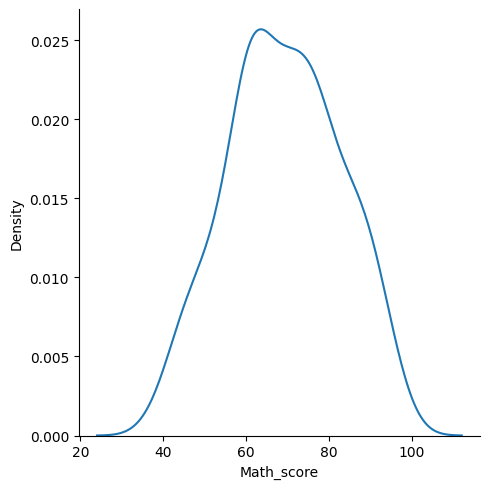

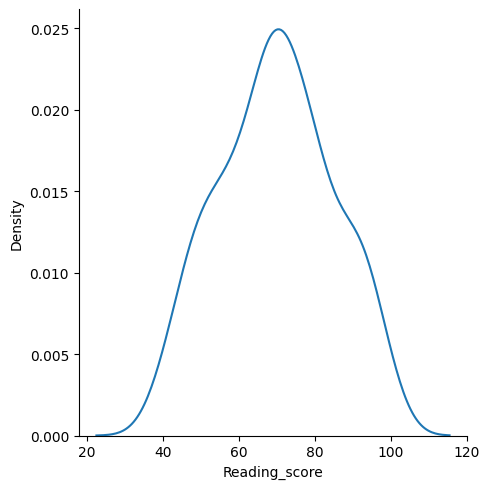

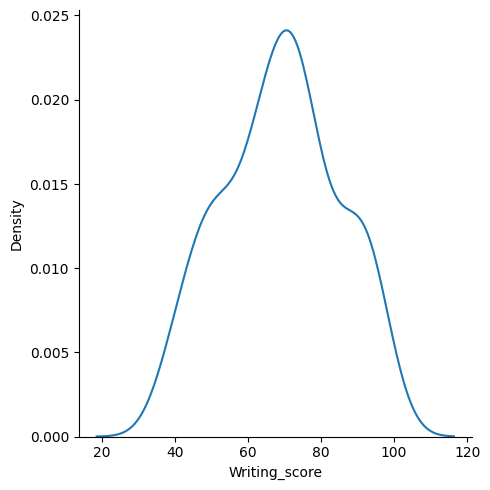

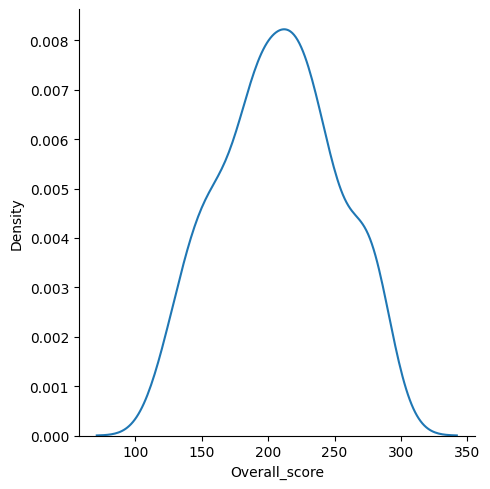

In [138]:
for i in df[['Math_score','Reading_score','Writing_score','Overall_score']]:
    sns.displot(x = df[i],kind="kde")
    plt.show()

#### 3.4.1. <a id='toc3_4_1_'></a>[Testing distributions normality](#toc0_)

##### None of these distributions follow the normal distribution

In [139]:
for i in df[['Math_score','Reading_score','Writing_score','Overall_score']]:
    print(f'{i} p-value: {round(shapiro(df[i])[1],4)}')

Math_score p-value: 0.0347
Reading_score p-value: 0.0116
Writing_score p-value: 0.0033
Overall_score p-value: 0.0055


## 4. <a id='toc4_'></a>[Influence of different variables on the exam scores](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Exam scores by Race/ethnicity groups](#toc0_)

#### 4.1.1. <a id='toc4_1_1_'></a>[Boxplots for each test among different Race/ethnicity groups](#toc0_)

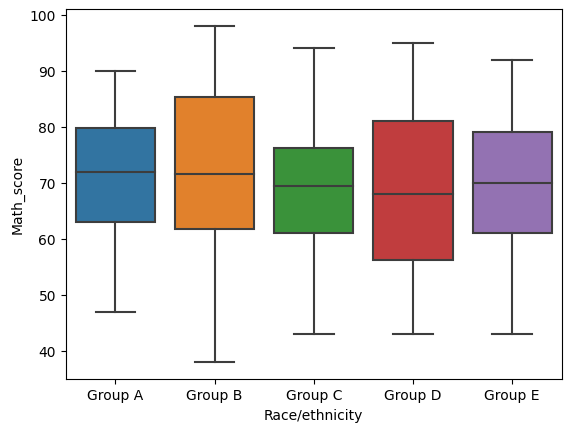

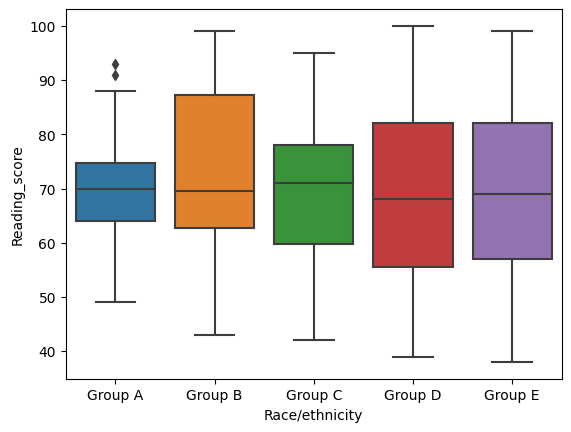

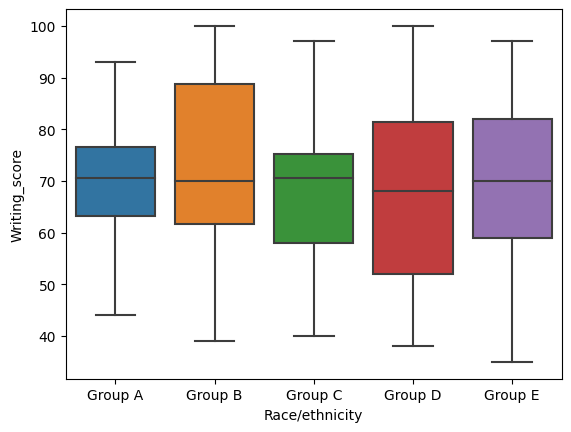

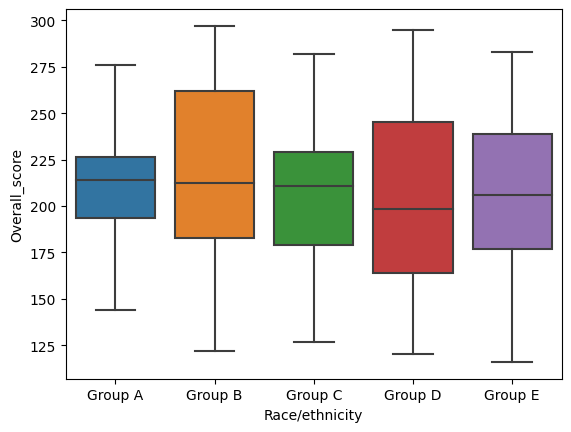

In [140]:
for test in df[['Math_score','Reading_score','Writing_score','Overall_score']]:
    sns.boxplot(data=df,
                x='Race/ethnicity',
                y=df[test],
                order = ['Group A','Group B','Group C','Group D','Group E'])
    plt.show()

#### 4.1.2. <a id='toc4_1_2_'></a>[Median of scores by race/ethnicity](#toc0_)

##### * Group A has the highest overall score median (214)
##### *  Group D has the lowest overall score median (198.5)

In [141]:
df.groupby(['Race/ethnicity'])[['Math_score','Reading_score','Writing_score','Overall_score']].median().reset_index()

,Race/ethnicity,Math_score,Reading_score,Writing_score,Overall_score
0,Group A,72.0,70.0,70.5,214.0
1,Group B,71.5,69.5,70.0,212.5
2,Group C,69.5,71.0,70.5,210.5
3,Group D,68.0,68.0,68.0,198.5
4,Group E,70.0,69.0,70.0,206.0


### 4.2. <a id='toc4_2_'></a>[Correlation between parental level of education and overall score](#toc0_)

##### The table above shows that the higher the parental level of education, the higher the overall score. One could expect a significant correlation between these variables. To be able to calculate it, parental level of education has to be transformed to a numeric variable (level of education is a scale variable)

In [142]:
df.groupby(['Parental_level_of_education'])[['Math_score','Reading_score','Writing_score','Overall_score']].median().reset_index().sort_values('Overall_score',ascending=False)

,Parental_level_of_education,Math_score,Reading_score,Writing_score,Overall_score
3,Master's degree,92.0,95.0,94.0,282.0
1,Bachelor's degree,83.0,85.0,86.0,250.0
0,Associate's degree,73.0,75.0,74.0,225.0
4,Some college,72.0,71.0,71.0,214.0
2,High school,62.0,64.0,64.0,190.0
5,Some high school,62.5,62.0,61.5,183.5


#### 4.2.1. <a id='toc4_2_1_'></a>[Creating new column - assigning numeric values to the parental level of education](#toc0_)

In [143]:
df['Parental_level_of_education'].unique()

array(["Bachelor's degree", 'Some college', "Master's degree",
       "Associate's degree", 'High school', 'Some high school'],
      dtype=object)

In [144]:
df['Parental_level_of_education_num'] = df['Parental_level_of_education'].replace({"""Bachelor's degree""":5,
                                                                                    "Some college":3,
                                                                                    """Master's degree""":6,
                                                                                    """Associate's degree""": 4,
                                                                                    "High school": 2,
                                                                                    "Some high school" : 1})

In [145]:
df[['Parental_level_of_education','Parental_level_of_education_num','Overall_score']]

,Parental_level_of_education,Parental_level_of_education_num,Overall_score
0,Bachelor's degree,5,218
1,Some college,3,247
2,Master's degree,6,278
3,Associate's degree,4,148
4,Some college,3,229
...,...,...,...
202,Some college,3,188
203,Some high school,1,205
204,Bachelor's degree,5,279
205,High school,2,179


#####  The better the level of parental education, the higher the overall score (corr = 0.47)

In [146]:
scipy.stats.spearmanr(df['Parental_level_of_education_num'],df['Overall_score'])

SpearmanrResult(correlation=0.4718902725450895, pvalue=7.097589451431622e-13)

### 4.3. <a id='toc4_3_'></a>[Lunch influence on the scores](#toc0_)

In [147]:
df_lunch = df.groupby(['Lunch'])[['Math_score','Reading_score','Writing_score','Overall_score']].median().reset_index()

#### 4.3.1. <a id='toc4_3_1_'></a>[Median scores based on whether or not students ate lunch](#toc0_)

In [148]:
df_lunch

,Lunch,Math_score,Reading_score,Writing_score,Overall_score
0,No,63.5,64.5,64.5,192.5
1,Yes,72.0,72.0,71.0,217.0


In [149]:
df_lunch_long = pd.melt(df_lunch,id_vars="Lunch",value_vars=['Math_score','Reading_score','Writing_score','Overall_score'])

In [150]:
df_lunch_long

,Lunch,variable,value
0,No,Math_score,63.5
1,Yes,Math_score,72.0
2,No,Reading_score,64.5
3,Yes,Reading_score,72.0
4,No,Writing_score,64.5
5,Yes,Writing_score,71.0
6,No,Overall_score,192.5
7,Yes,Overall_score,217.0


#### 4.3.2. <a id='toc4_3_2_'></a>[Plotting the results](#toc0_)

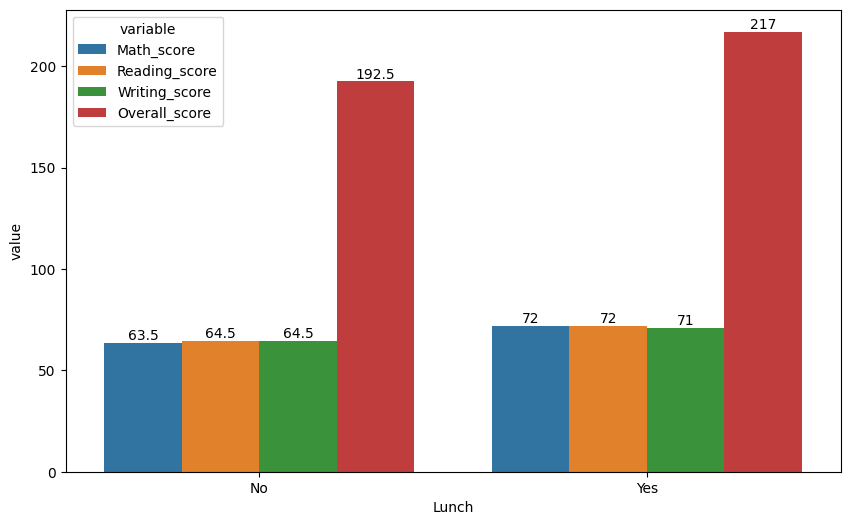

In [151]:
plt.figure(figsize=(10,6))
bar = sns.barplot(data = df_lunch_long,
            x='Lunch',
            y='value',
            hue='variable')
for i in range(0,4):
    plt.bar_label(bar.containers[i])
plt.show()

### 4.4. <a id='toc4_4_'></a>[Test preparation course's influence on the median scores](#toc0_)

#### 4.4.1. <a id='toc4_4_1_'></a>[Median scores based on whether or not students participated in a preparation course](#toc0_)

In [152]:
df.groupby(['Test_preparation_course'])[['Math_score','Reading_score','Writing_score','Overall_score']].median().reset_index()

,Test_preparation_course,Math_score,Reading_score,Writing_score,Overall_score
0,Completed,79.0,80.0,79.0,237.0
1,None,61.5,61.5,60.5,182.5


In [153]:
df_test_prep = df.groupby(['Test_preparation_course'])[['Math_score','Reading_score','Writing_score','Overall_score']].median().reset_index().melt(
    id_vars = 'Test_preparation_course',
    value_vars=['Math_score','Reading_score','Writing_score','Overall_score'])

In [154]:
df_test_prep

,Test_preparation_course,variable,value
0,Completed,Math_score,79.0
1,None,Math_score,61.5
2,Completed,Reading_score,80.0
3,None,Reading_score,61.5
4,Completed,Writing_score,79.0
5,None,Writing_score,60.5
6,Completed,Overall_score,237.0
7,None,Overall_score,182.5


#### 4.4.2. <a id='toc4_4_2_'></a>[Plotting the results](#toc0_)

Text(0.5, 1.0, 'Exam Scores by Test Preparation Course')

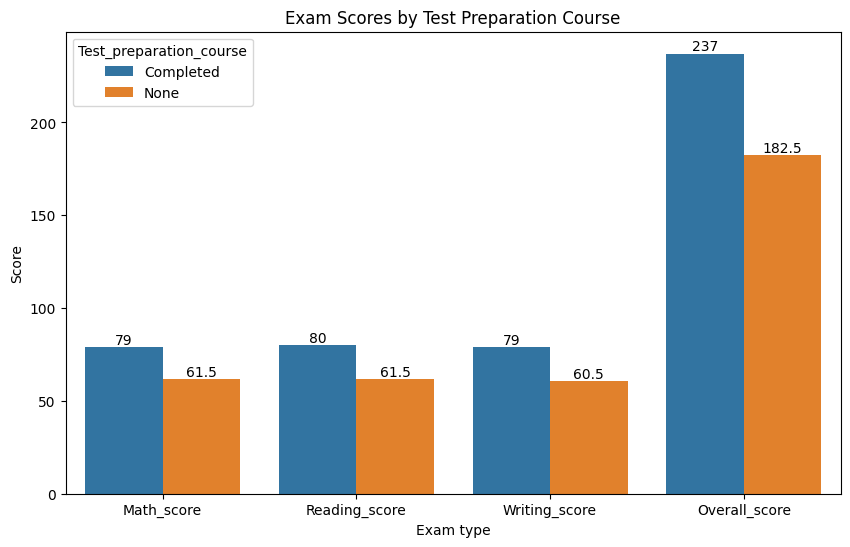

In [155]:
plt.figure(figsize=(10,6))
bar = sns.barplot(data=df_test_prep,
            x='variable',
            y='value',
            hue='Test_preparation_course')
for i in range(0,2):
    plt.bar_label(bar.containers[i])
plt.xlabel('Exam type')
plt.ylabel('Score')
plt.title('Exam Scores by Test Preparation Course')

## 5. <a id='toc5_'></a>[Gender distribution](#toc0_)

##### The gender distribution in each group is fairly even, except for Group B, where there are 2 times as many women as men.

Text(0.5, 1.0, 'Race/ethnicity Frequency by Sex')

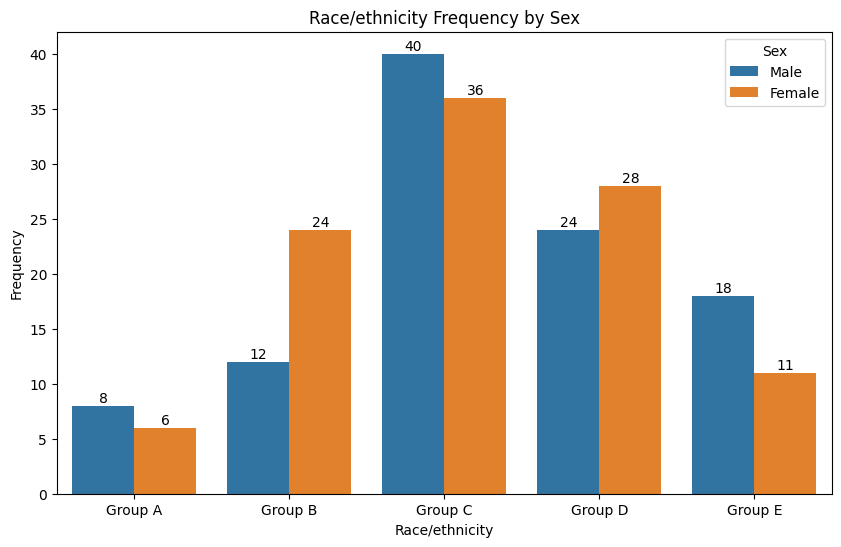

In [156]:
plt.figure(figsize=(10,6))
bar = sns.barplot(data = df[['Sex','Race/ethnicity']].value_counts().reset_index(name='freq'),
            x='Race/ethnicity',
            y='freq',
            hue='Sex',
            order = ['Group A','Group B','Group C','Group D','Group E'])
for i in range(0,2):
    plt.bar_label(bar.containers[i])
plt.xlabel('Race/ethnicity')
plt.ylabel('Frequency')
plt.title('Race/ethnicity Frequency by Sex')